In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
merch = pd.read_csv('merch_sales.csv')
df = merch.copy()
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

In [5]:
df.shape

(7394, 15)

In [6]:
df.isnull().sum()

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64

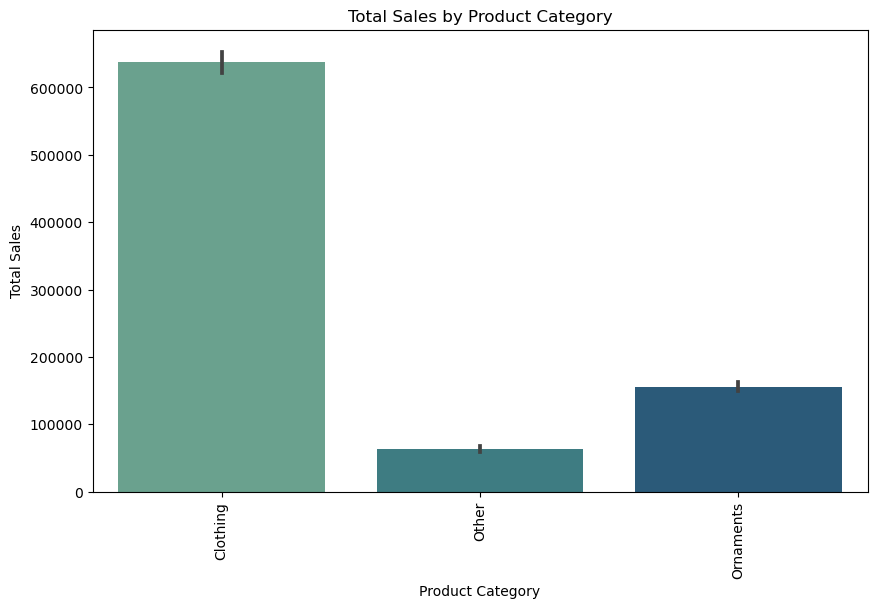

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Sales', data=df, estimator=sum, palette='crest')
plt.xticks(rotation=90)
plt.title('Total Sales by Product Category')
plt.show()

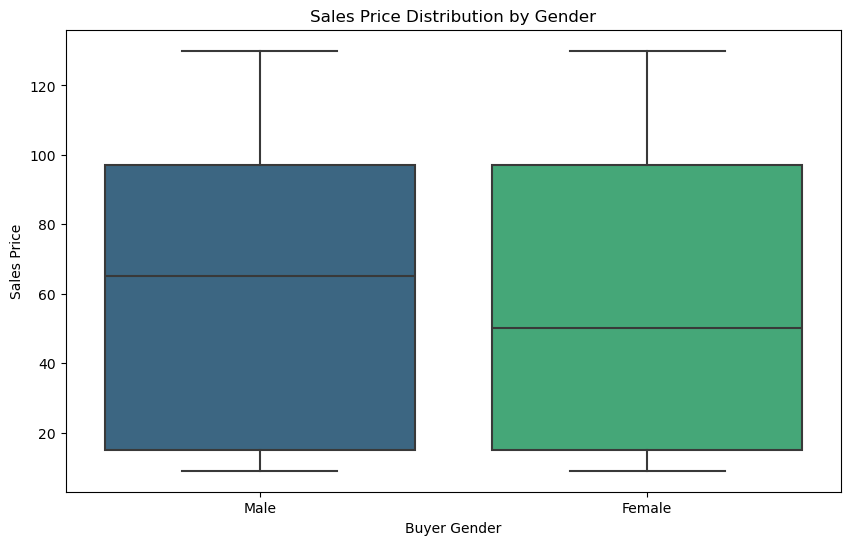

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Buyer Gender', y='Sales Price', data=df, palette='viridis')
plt.title('Sales Price Distribution by Gender')
plt.show()

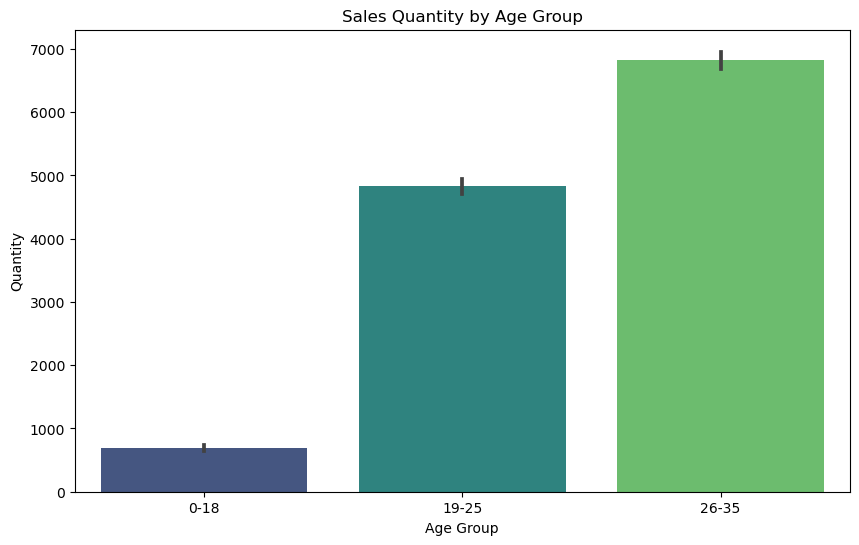

In [17]:
bins = [0, 18, 25, 35]
labels = ['0-18', '19-25', '26-35']
df['Age Group'] = pd.cut(df['Buyer Age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Quantity', data=df, estimator=sum, palette='viridis')
plt.title('Sales Quantity by Age Group')
plt.show()

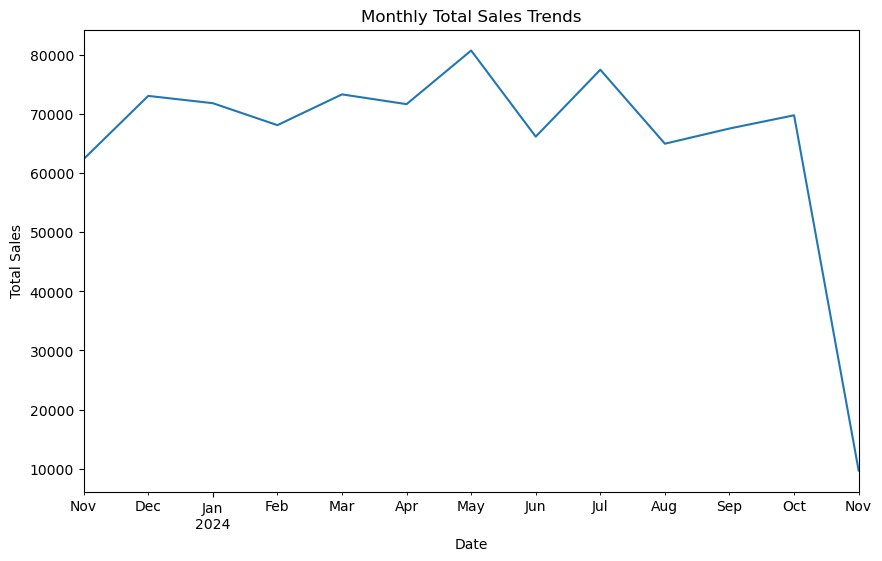

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

plt.figure(figsize=(10, 6))
df.set_index('Order Date').resample('M')['Total Sales'].sum().plot()
plt.title('Monthly Total Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

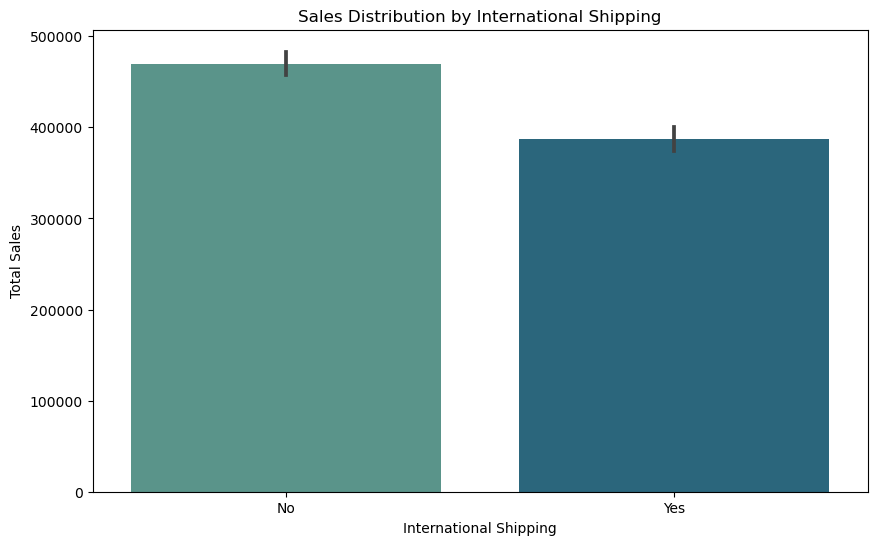

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='International Shipping', y='Total Sales', data=df, estimator=sum, palette='crest')
plt.title('Sales Distribution by International Shipping')
plt.show()

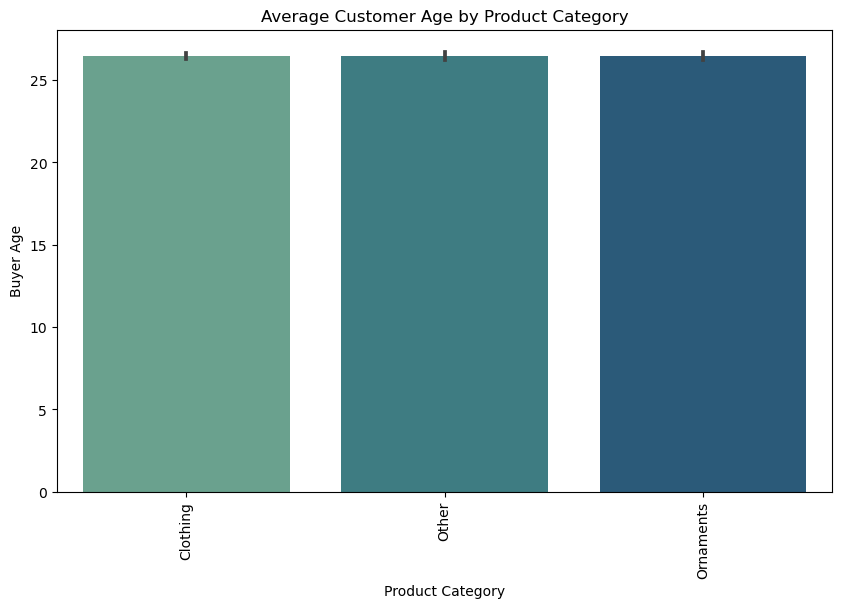

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Buyer Age', data=df, estimator=np.mean, palette='crest')
plt.xticks(rotation=90)
plt.title('Average Customer Age by Product Category')
plt.show()

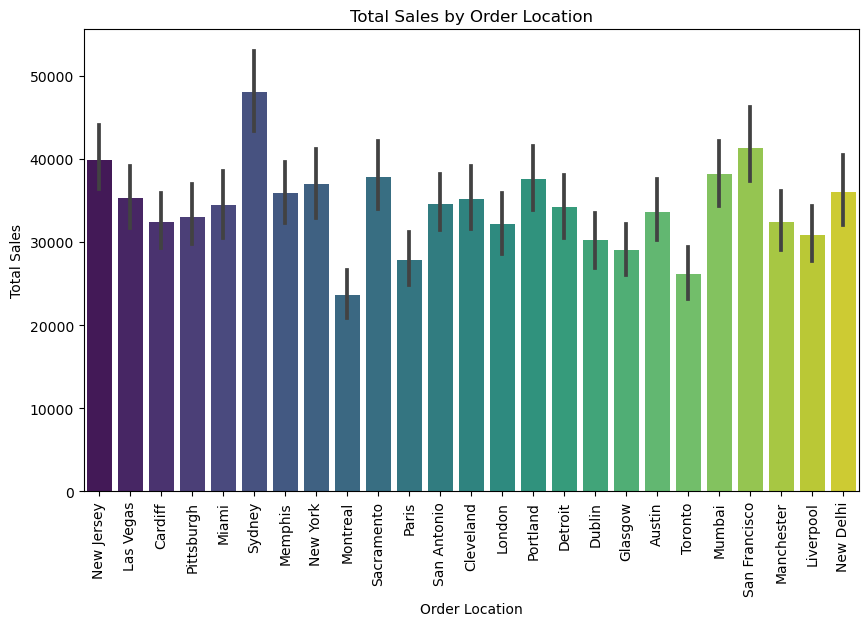

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Location', y='Total Sales', data=df, estimator=sum, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Sales by Order Location')
plt.show()

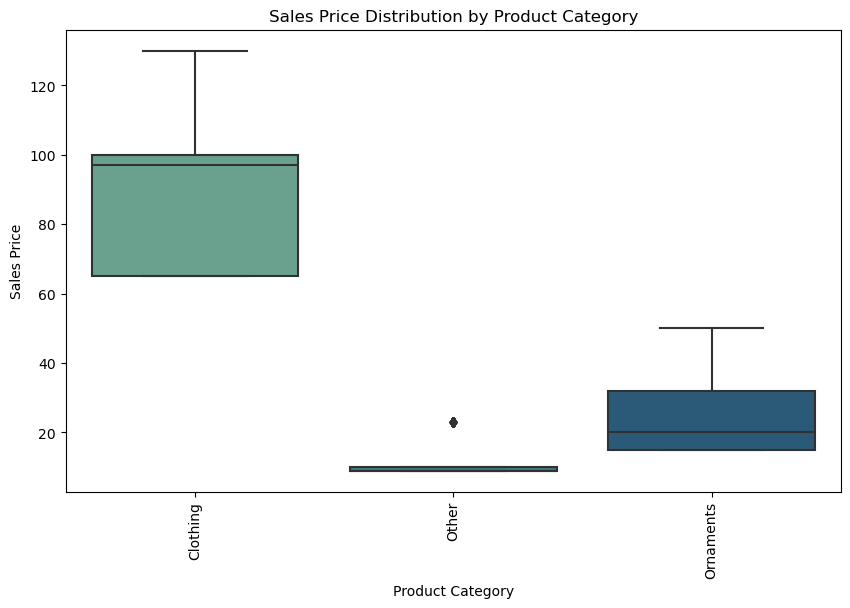

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Category', y='Sales Price', data=df, palette='crest')
plt.xticks(rotation=90)
plt.title('Sales Price Distribution by Product Category')
plt.show()

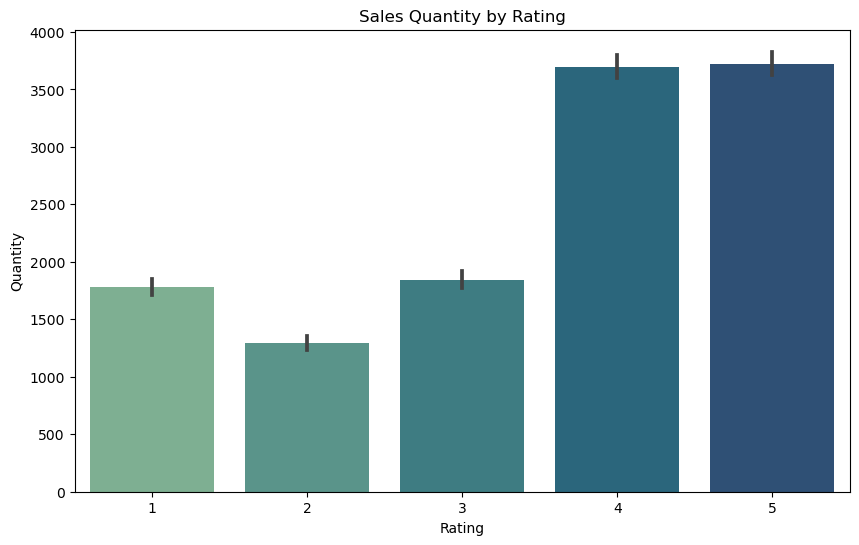

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Quantity', data=df, estimator=sum, palette='crest')
plt.title('Sales Quantity by Rating')
plt.show()

In [26]:
df = df.drop(columns=['Order ID','Order Date','Product ID','Age Group','Review'])

In [27]:
df.head()

,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
0,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4
1,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3
2,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2
3,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3
4,Other,Female,19,Miami,No,10,0,10,3,30,5


In [28]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Product Category
0 -> Clothing
1 -> Ornaments
2 -> Other

Column: Buyer Gender
0 -> Female
1 -> Male

Column: Order Location
0 -> Austin
1 -> Cardiff
2 -> Cleveland
3 -> Detroit
4 -> Dublin
5 -> Glasgow
6 -> Las Vegas
7 -> Liverpool
8 -> London
9 -> Manchester
10 -> Memphis
11 -> Miami
12 -> Montreal
13 -> Mumbai
14 -> New Delhi
15 -> New Jersey
16 -> New York
17 -> Paris
18 -> Pittsburgh
19 -> Portland
20 -> Sacramento
21 -> San Antonio
22 -> San Francisco
23 -> Sydney
24 -> Toronto

Column: International Shipping
0 -> No
1 -> Yes



In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Sales Price',axis = 1)
y = df['Sales Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)

(5175, 10) (2219, 10)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [33]:
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {knn_mse}")
print(f"R2 Score: {knn_r2}")

Mean Squared Error: 68.87607030193782
R2 Score: 0.9562494359493632
